## 1 - Importer les bibliotheques et le dataset

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [113]:
data=pd.read_csv('creditcard.csv')

## 2 - Afficher les 5 premieres lignes et Vérifier les statistiques descriptives

In [114]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [116]:

print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## 3 - verification des valeurs null et suppression des doublons

In [28]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [30]:
data=data.drop_duplicates()

## 4 - mise a l'echelle de la collone 'Amount'

In [25]:
sc=StandardScaler()
data["Amount"]=sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## 5 - gérer les déséquilibres

In [67]:
data["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: >

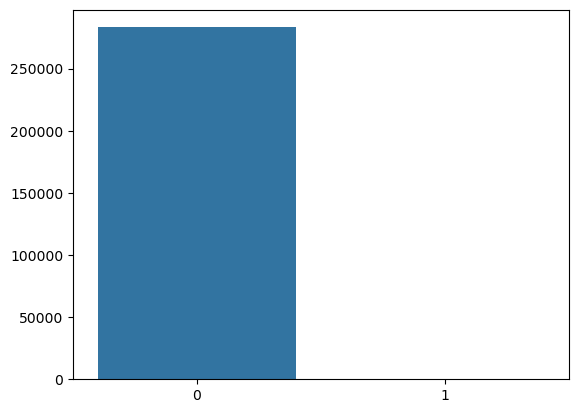

In [72]:
class_counts = data["Class"].value_counts()


sns.barplot(x=class_counts.index, y=class_counts.values)


In [76]:
# Separation des features (X) et de la variable cible (y)
X=data.drop("Class",axis=1)
y=data["Class"]

In [79]:
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(X,y)

In [83]:
y_resampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

## 6 - Separation des donnees en train et test

In [86]:
X_train,X_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

## 7 - importation de l'algorithme de la régression logistique

In [87]:
from sklearn.linear_model import LogisticRegression

## 8- instanciation et entrainement du model

In [101]:
log = LogisticRegression(max_iter=1000)  
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## 9-Prediction et evaluation de la performance du model

In [102]:
y_predict=log.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, roc_auc_score,confusion_matrix

In [110]:
print ('Accuracy :',accuracy_score(y_test,y_predict))
print ('Precision :',precision_score(y_test,y_predict))
print ('Recall :',recall_score(y_test,y_predict))
print ('F1_score :',f1_score(y_test,y_predict))
conf_matrix = confusion_matrix(y_test, y_predict)
print('Matrice de confusion :')
print(conf_matrix)


Accuracy : 0.970821344724718
Precision : 0.9807288205607141
Recall : 0.9607135945389609
F1_score : 0.9706180344478217
Matrice de confusion :
[[55390  1073]
 [ 2233 54606]]


In [121]:
# Validation croisée
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log, x_resampled,y_resampled, cv=5)  
print('Scores de validation croisée :', scores)

# Caractéristiques importantes
coefficients = log.coef_[0]
feature_names = X.columns.tolist()
feature_importance = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
print('Caractéristiques importantes :')

Scores de validation croisée : [0.94129848 0.97001792 0.97137713 0.97143891 0.96833214]
Caractéristiques importantes :


Interprétation des résultats obtenus dans notre étude :

Dans notre étude, nous avons évalué notre modèle en utilisant la technique de validation croisée. Cette méthode nous permet d'estimer la capacité de notre modèle à généraliser sur de nouvelles données. Nos résultats montrent une performance stable sur cinq plis différents, avec des scores de validation croisée respectifs de :

0.9413
0.9700
0.9714
0.9714
0.9683
Ces scores indiquent que notre modèle obtient généralement de bons résultats sur des données qu'il n'a pas vues lors de l'apprentissage, avec une moyenne proche de 0.9645. Cela suggère une capacité encourageante à généraliser au-delà de nos données d'entraînement.

En ce qui concerne l'impact de chaque caractéristique (feature) sur nos prédictions, nous avons analysé les coefficients attribués par notre modèle à chaque caractéristique. Ces coefficients représentent l'importance relative de chaque caractéristique dans nos prédictions. Nous avons constaté que certaines caractéristiques ont des influences plus marquées sur nos prédictions que d'autres. Par exemple, les caractéristiques telles que V14, V17 et V3 ont des coefficients négatifs plus élevés, ce qui indique une corrélation plus forte avec une diminution de la prédiction, tandis que des caractéristiques telles que V4, Amount, et V5 ont des coefficients positifs, montrant une corrélation positive plus prononcée avec une augmentation de la prédiction.

Il est important de noter que ces résultats de coefficients ne mesurent pas nécessairement la causalité mais plutôt la force de l'association entre les caractéristiques et les prédictions de notre modèle. Une interprétation plus approfondie serait nécessaire pour déterminer comment ces caractéristiques contribuent réellement à nos prédictions.

En somme, nos scores de validation croisée indiquent une bonne capacité de généralisation de notre modèle, tandis que nos analyses de caractéristiques importantes fournissent des indices sur lesquels nous pouvons nous appuyer pour mieux comprendre les prédictions de notre modèle de manière plus détaillée.

## 10 - Enregistrer le model

In [122]:
import joblib

In [123]:
joblib.dump(log,"credit_card_model")

['credit_card_model']

# importer et tester

In [125]:
model = joblib.load("credit_card_model")
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


C:\Users\diattus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
